In [3]:
%pip install matplotlib


In [4]:
from pathlib import Path
import sys, importlib, numpy as np, pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, str(Path.cwd().parent))
from src.data import load_clean

reports = Path.cwd().parent / "reports"
reports.mkdir(exist_ok=True)

df = load_clean()
df.shape

(999, 17)

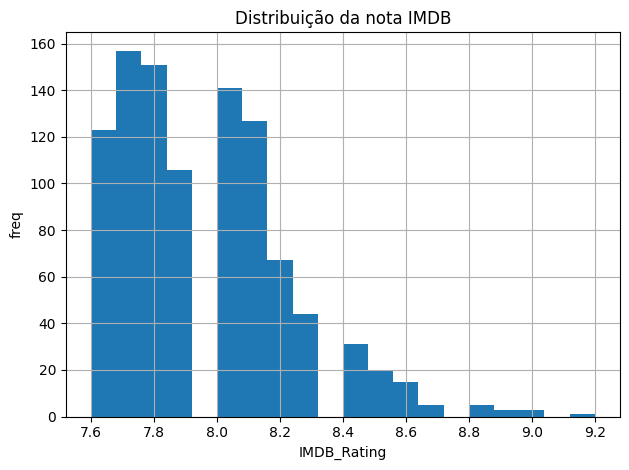

In [5]:
plt.figure()
df["IMDB_Rating"].dropna().hist(bins=20)
plt.xlabel("IMDB_Rating")
plt.ylabel("freq")
plt.title("Distribuição da nota IMDB")
plt.tight_layout()
plt.savefig(reports / "fig_rating_hist.png", dpi=150)

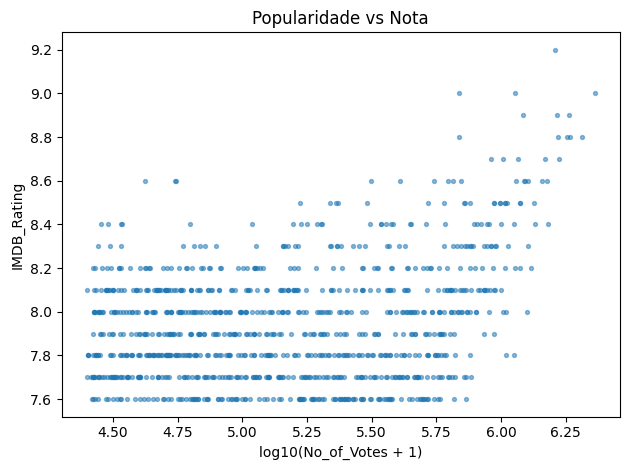

In [6]:
plt.figure()
x = np.log10(df["No_of_Votes"].astype(float) + 1)
y = df["IMDB_Rating"].astype(float)
plt.scatter(x, y, s=8, alpha=0.5)
plt.xlabel("log10(No_of_Votes + 1)")
plt.ylabel("IMDB_Rating")
plt.title("Popularidade vs Nota")
plt.tight_layout()
plt.savefig(reports / "fig_votes_vs_rating.png", dpi=150)

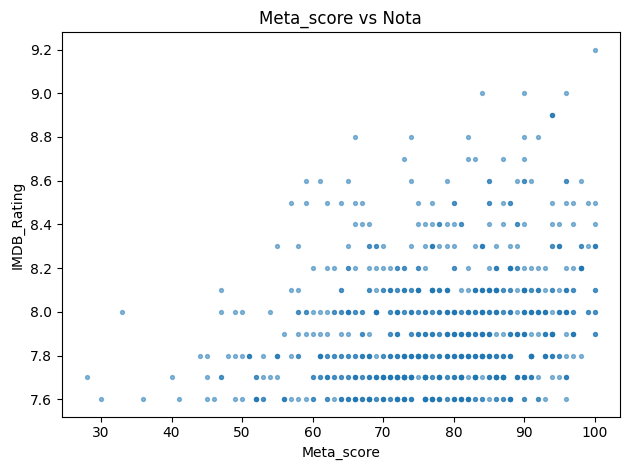

In [8]:
plt.figure()
plt.scatter(df["Meta_score"].astype(float), y, s=8, alpha=0.5)
plt.xlabel("Meta_score")
plt.ylabel("IMDB_Rating")
plt.title("Meta_score vs Nota")
plt.tight_layout()
plt.savefig(reports / "fig_meta_vs_rating.png", dpi=150)

In [9]:
genres = df.assign(Genre=df["Genre"].fillna("").astype(str).str.split(",")).explode("Genre")
genres["Genre"] = genres["Genre"].str.strip()
g = (genres[genres["Genre"] != ""]
     .groupby("Genre")["IMDB_Rating"]
     .agg(n_titulos="count", media="mean")
     .sort_values(["n_titulos","media"], ascending=[False, False]))
g.to_csv(reports / "genres_stats.csv", index=True)

In [10]:
hyp = [
    "H1: Filmes com mais votos tendem a ter nota ligeiramente mais alta.",
    "H2: Meta_score correlaciona positivamente com IMDB_Rating.",
    "H3: Alguns gêneros dominantes em volume (ex.: Drama) concentram notas altas por amostragem.",
]
(reports / "eda_hypotheses.txt").write_text("\n".join(hyp), encoding="utf-8")

print("ok: figuras em reports/ e hipóteses salvas.")

ok: figuras em reports/ e hipóteses salvas.
